In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
!gdown 1eguoCzmMcorfMZT2mB7thYElBInkiWif

Downloading...
From: https://drive.google.com/uc?id=1eguoCzmMcorfMZT2mB7thYElBInkiWif
To: /content/delhivery_data.csv
100% 55.6M/55.6M [00:00<00:00, 81.0MB/s]


In [3]:
df = pd.read_csv('/content/delhivery_data.csv')

Problem Statement : Need to clean, sanitize and manipulate data to get useful features out of raw fields data coming out of data engineering pipelines. Also need to figure out sense out of the raw data to help the data science team to build forecasting models on it.

In [5]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [4]:
#Checking the shape of the data
df.shape

(144867, 24)

In [6]:
#checking for null values
df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [7]:

#checking the data types and non null counts of differrnt metrics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [8]:
#checking for unique values in each columns
df.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
dtype: int64

In [9]:
#Removing null values
df = df.dropna(how='any')
df = df.reset_index(drop=True)

In [10]:
#Converting time columns into pandas datetime
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

In [11]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144316 entries, 0 to 144315
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  object        
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

In [13]:
#Grouping by sub-journey in the trip
df['segment_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']

segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

for col in segment_cols:
    df[col + '_sum'] = df.groupby('segment_key')[col].cumsum()
    
df[[col + '_sum' for col in segment_cols]]

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0
...,...,...,...
144311,92.0,65.3487,94.0
144312,118.0,82.7212,115.0
144313,138.0,103.4265,149.0
144314,155.0,122.3150,176.0


In [14]:
#aggregating at sub-jouney lebel
create_segment_dict = {
    
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',
    
    'destination_center' : 'last',
    'destination_name' : 'last',
    
    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',
    
    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',
    
    'osrm_time' : 'last',
    'osrm_distance' : 'last',
    
    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',
    
}

In [15]:
#Grouping mini-trips, sorting by time
segment = df.groupby('segment_key').agg(create_segment_dict).reset_index()
segment = segment.sort_values(by=['segment_key','od_end_time'], ascending=True).reset_index()

In [16]:
segment

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,...,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,...,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,...,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,...,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,...,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,26217,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,...,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0
26218,26218,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,...,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0
26219,26219,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,...,2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,16.0184,14.0
26220,26220,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,...,2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0


In [17]:
segment[segment['trip_uuid'] == 'trip-153741093647649320' ]

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
10370,10370,trip-153741093647649320IND388121AAAIND388620AAB,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,...,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,67.0,49.4772,44.0
10371,10371,trip-153741093647649320IND388620AABIND388320AAA,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,...,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,100.0,53.2334,44.0


In [18]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           26222 non-null  int64         
 1   segment_key                     26222 non-null  object        
 2   data                            26222 non-null  object        
 3   trip_creation_time              26222 non-null  object        
 4   route_schedule_uuid             26222 non-null  object        
 5   route_type                      26222 non-null  object        
 6   trip_uuid                       26222 non-null  object        
 7   source_center                   26222 non-null  object        
 8   source_name                     26222 non-null  object        
 9   destination_center              26222 non-null  object        
 10  destination_name                26222 non-null  object        
 11  od

In [19]:
#Calculating time taken between od_start_time and od_end_time and keep it as a feature
segment['od_time_diff_hour'] = (segment['od_end_time'] - segment['od_start_time']).dt.total_seconds() /(60)
segment['od_time_diff_hour']

0        1260.604421
1         999.505379
2          58.832388
3         122.779486
4         834.638929
            ...     
26217      62.115193
26218      91.087797
26219      44.174403
26220     287.474007
26221      66.933565
Name: od_time_diff_hour, Length: 26222, dtype: float64

In [20]:
segment

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,...,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0,1260.604421
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,...,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0,999.505379
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,...,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0,58.832388
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,...,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0,122.779486
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,...,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0,834.638929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,26217,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),IND627657AAA,...,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.1431,42.0,62.115193
26218,26218,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,...,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,78.5869,77.0,91.087797
26219,26219,trip-153861115439069069IND628801AAAIND628204AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628801AAA,Eral_Busstand_D (Tamil Nadu),IND628204AAA,...,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,16.0184,14.0,44.174403
26220,26220,trip-153861118270144424IND583119AAAIND583101AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,...,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,52.5303,42.0,287.474007


In [21]:
create_trip_dict = {
    
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    
    'source_center' : 'first',
    'source_name' : 'first',
    
    'destination_center' : 'last',
    'destination_name' : 'last',
    
    'start_scan_to_end_scan' : 'sum',
    'od_time_diff_hour' : 'sum', 
    
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',
    
    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',
    
}

In [22]:
trip = segment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop = True)

In [23]:
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,258.028928,57.762332,83.0,62.0,73.4630,82.0,64.8551,62.0
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,60.590521,15.513784,21.0,12.0,16.0882,21.0,16.0883,11.0
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,422.119867,38.684839,282.0,48.0,58.9037,281.0,104.8866,88.0
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,348.512862,134.723836,264.0,179.0,171.1103,258.0,223.5324,221.0


In [24]:
trip[['actual_time', 'segment_actual_time_sum']]

,actual_time,segment_actual_time_sum
0,1562.0,1548.0
1,143.0,141.0
2,3347.0,3308.0
3,59.0,59.0
4,341.0,340.0
...,...,...
14782,83.0,82.0
14783,21.0,21.0
14784,282.0,281.0
14785,264.0,258.0


In [25]:
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,258.028928,57.762332,83.0,62.0,73.4630,82.0,64.8551,62.0
14783,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,60.590521,15.513784,21.0,12.0,16.0882,21.0,16.0883,11.0
14784,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,422.119867,38.684839,282.0,48.0,58.9037,281.0,104.8866,88.0
14785,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,348.512862,134.723836,264.0,179.0,171.1103,258.0,223.5324,221.0


In [26]:
trip[trip['trip_uuid'] == 'trip-153741093647649320' ]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
5917,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),195.0,195.386819,82.981842,170.0,89.0,107.4515,167.0,102.7106,88.0


In [27]:
trip[['actual_distance_to_destination', 'osrm_distance']]

,actual_distance_to_destination,osrm_distance
0,824.732854,991.3523
1,73.186911,85.1110
2,1927.404273,2354.0665
3,17.175274,19.6800
4,127.448500,146.7918
...,...,...
14782,57.762332,73.4630
14783,15.513784,16.0882
14784,38.684839,58.9037
14785,134.723836,171.1103


In [28]:
#Hypothesis Testing --> Recommendation to the business

In [29]:
trip['destination_name'] = trip['destination_name'].str.lower() # lowering all columns
trip['source_name'] = trip['source_name']

In [30]:
def place2state(x):
    # transform "gurgaon_bilaspur_hb (haryana)" into "haryana"
    state = x.split('(')[1]
    
    return state[:-1] #removing ')' from ending

def place2city(x):
    #we will remove state
    city = x.split(' (')[0]
    
    city = city.split('_')[0]
    
    # Now daling with edge cases
          
    if city == 'pnq vadgaon sheri dpc': return 'vadgaonsheri'

    # ['PNQ Pashan DPC', 'Bhopal MP Nagar', 'HBR Layout PC',
    #  'PNQ Rahatani DPC', 'Pune Balaji Nagar', 'Mumbai Antop Hill']

    if city in ['pnq pashan dpc','pnq rahatani dpc', 'pune balaji nagar']:
        return 'pune'

    if city == 'hbr layout pc' :
        return 'bengaluru'
    if city == 'bhopal mp nagar':
        return 'bhopal'
    if city == 'mumbai antop hill':
        return 'mumbai'

    return city

def place2city_place(x):

    # we will remove state
    x = x.split('(')[0]

    len_ = len(x.split('_'))

    if len_ >= 3:
        return x.split('_')[1]

    # small cities have same city and place name
    if len_ == 2:
        return x.split('_')[0]

    # now we need to deal with edge cases or imporper name convention

    # if len(x.split('_')) == 2:

    return x.split(' ')[0]
    
def place2code(x):
    # we will remove state
    x = x.split('(')[0]

    if len(x.split('_')) >= 3:
        return x.split('_')[-1]

    return 'none'

In [31]:
trip['destination_state'] = trip['destination_name'].apply(lambda x: place2state(x))
trip['destination_city']  = trip['destination_name'].apply(lambda x: place2city(x))
trip['destination_place'] = trip['destination_name'].apply(lambda x: place2city_place(x))
trip['destination_code']  = trip['destination_name'].apply(lambda x: place2code(x))

In [32]:
trip[['destination_state','destination_city','destination_place','destination_code']]

,destination_state,destination_city,destination_place,destination_code
0,uttar pradesh,kanpur,central,6
1,karnataka,doddablpur,chikadpp,d
2,haryana,gurgaon,bilaspur,hb
3,maharashtra,mumbai,mirard,ip
4,karnataka,sandur,wrdn1dpp,d
...,...,...,...,...
14782,punjab,chandigarh,mehmdpur,h
14783,haryana,faridabad,blbgarh,dc
14784,uttar pradesh,kanpur,govndngr,dc
14785,tamil nadu,tirchchndr,shnmgprm,d


In [33]:
trip['trip_creation_time'] = pd.to_datetime(trip['trip_creation_time'])

trip['trip_year'] = trip['trip_creation_time'].dt.year
trip['trip_month'] = trip['trip_creation_time'].dt.month
trip['trip_hour'] = trip['trip_creation_time'].dt.hour
trip['trip_day'] = trip['trip_creation_time'].dt.day
trip['trip_week'] = trip['trip_creation_time'].dt.isocalendar().week
trip['trip_dayofweek'] = trip['trip_creation_time'].dt.dayofweek

In [34]:
trip[['trip_year','trip_month','trip_hour','trip_day','trip_week','trip_dayofweek']]

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2
3,2018,9,0,12,37,2
4,2018,9,0,12,37,2
...,...,...,...,...,...,...
14782,2018,10,23,3,40,2
14783,2018,10,23,3,40,2
14784,2018,10,23,3,40,2
14785,2018,10,23,3,40,2


In [35]:
trip.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,destination_state,destination_city,destination_place,destination_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),2259.0,...,uttar pradesh,kanpur,central,6,2018,9,0,12,37,2
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,...,karnataka,doddablpur,chikadpp,d,2018,9,0,12,37,2
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),3933.0,...,haryana,gurgaon,bilaspur,hb,2018,9,0,12,37,2
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,...,maharashtra,mumbai,mirard,ip,2018,9,0,12,37,2
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,...,karnataka,sandur,wrdn1dpp,d,2018,9,0,12,37,2


In [36]:
num_cols = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time',
            'osrm_distance','segment_actual_time_sum','segment_osrm_distance_sum',
           'segment_osrm_time_sum', 'od_time_diff_hour']

<Axes: >

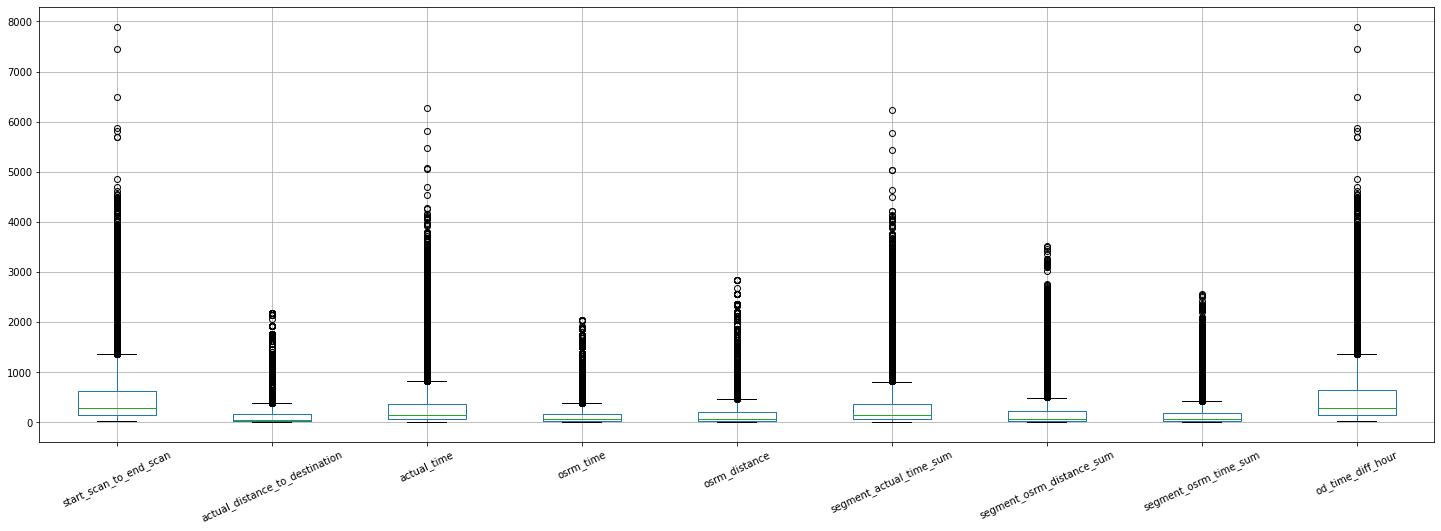

In [37]:
#Find outliers in numericals variable
trip[num_cols].boxplot(rot=25, figsize=(25,8))

In [38]:
#Handle the outliers using IQR method
Q1 = trip[num_cols].quantile(0.25)
Q3 = trip[num_cols].quantile(0.75)

IQR = Q3 - Q1

In [39]:
trip = trip[-((trip[num_cols] < (Q1 - 1.5 * IQR)) | (trip[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
trip = trip.reset_index(drop=True) 

In [40]:
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,destination_state,destination_city,destination_place,destination_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,...,karnataka,doddablpur,chikadpp,d,2018,9,0,12,37,2
1,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,...,maharashtra,mumbai,mirard,ip,2018,9,0,12,37,2
2,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,...,karnataka,sandur,wrdn1dpp,d,2018,9,0,12,37,2
3,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND600056AAA,chennai_poonamallee (tamil nadu),189.0,...,tamil nadu,chennai,chennai,none,2018,9,0,12,37,2
4,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153671066201138152,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,chennai_vandalur_dc (tamil nadu),98.0,...,tamil nadu,chennai,vandalur,dc,2018,9,0,12,37,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12718,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,chandigarh_mehmdpur_h (punjab),257.0,...,punjab,chandigarh,mehmdpur,h,2018,10,23,3,40,2
12719,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,faridabad_blbgarh_dc (haryana),60.0,...,haryana,faridabad,blbgarh,dc,2018,10,23,3,40,2
12720,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,kanpur_govndngr_dc (uttar pradesh),421.0,...,uttar pradesh,kanpur,govndngr,dc,2018,10,23,3,40,2
12721,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,tirchchndr_shnmgprm_d (tamil nadu),347.0,...,tamil nadu,tirchchndr,shnmgprm,d,2018,10,23,3,40,2


<Axes: >

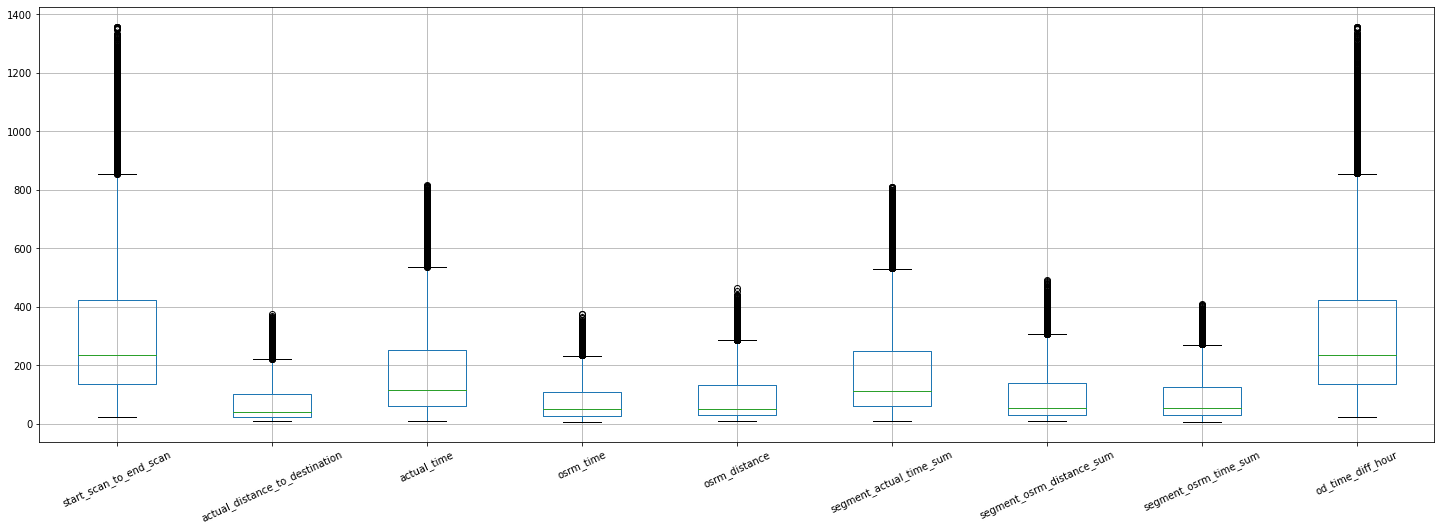

In [41]:
trip[num_cols].boxplot(rot=25, figsize=(25,8))

In [43]:
#Handling Categorical Variables
trip['route_type'].value_counts()

Carting    8812
FTL        3911
Name: route_type, dtype: int64

In [44]:
trip['route_type'] = trip['route_type'].map({'FTL':0, 'Carting':1})

In [46]:
#Normalize/Standarize the numerical features using MinMaxScaler or StandardScaler
scaler = StandardScaler()
scaler.fit(trip[num_cols])


StandardScaler()

In [47]:
trip[num_cols] = scaler.transform(trip[num_cols])

In [48]:
trip[num_cols]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,-0.548546,0.012060,-0.217856,-0.144341,-0.073948,-0.221500,-0.145358,-0.262662,-0.544839
1,-0.861602,-0.765152,-0.749015,-0.877085,-0.804506,-0.743482,-0.823653,-0.878225,-0.861856
2,1.552838,0.764988,1.034163,0.533102,0.614738,1.045260,0.514899,0.365464,1.552812
3,-0.513328,-0.662169,-0.736369,-0.766482,-0.710888,-0.737116,-0.737295,-0.790288,-0.510150
4,-0.869428,-0.877197,-0.970332,-0.904736,-0.890050,-0.966279,-0.906532,-0.915913,-0.871585
...,...,...,...,...,...,...,...,...,...
12718,-0.247231,-0.201970,-0.597255,-0.227293,-0.204002,-0.597073,-0.349273,-0.300349,-0.246189
12719,-1.018130,-0.788207,-0.989302,-0.918561,-0.844610,-0.985376,-0.863608,-0.941038,-1.017809
12720,0.394533,-0.466688,0.661086,-0.420848,-0.366561,0.669688,0.072932,0.026276,0.395103
12721,0.104957,0.865940,0.547267,1.390274,0.886261,0.523279,1.324267,1.697092,0.107436


In [49]:
trip[num_cols].describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
count,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04
mean,-1.619566e-17,-7.371818e-17,-8.041983e-17,4.467769e-17,3.797603e-17,-3.127438e-17,-8.488760e-17,6.031487e-17,-1.452025e-16
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,-1.162918e+00,-8.785574e-01,-1.065181e+00,-1.001514e+00,-9.229378e-01,-1.061764e+00,-9.375981e-01,-1.003850e+00,-1.162915e+00
25%,-7.207269e-01,-7.065920e-01,-7.363685e-01,-7.111809e-01,-7.077649e-01,-7.371165e-01,-7.228116e-01,-7.274750e-01,-7.210516e-01
50%,-3.411472e-01,-4.689012e-01,-4.012322e-01,-3.931975e-01,-4.836339e-01,-3.997380e-01,-4.628077e-01,-4.134119e-01,-3.418602e-01
75%,4.023595e-01,4.073375e-01,4.650634e-01,4.224989e-01,4.419548e-01,4.596223e-01,4.488499e-01,4.910897e-01,4.020802e-01
max,4.049455e+00,4.178358e+00,4.031419e+00,4.113871e+00,4.150641e+00,4.037107e+00,4.130135e+00,4.046283e+00,4.050310e+00


## Business Insights:


*   North, South and West Zones comidors have significant traffic of orders.
*   Lesser traffic of orders from Central, Eastern and North-Eastern zone.
*   we have heavy traffic in Mahrashtra followed by Karnataka.






## Recommendations:
* There is a significant difference between OSRM time aggregated, distance aggregated values as compared to actual parameters.
* Delivery need to plan for resources on ground in Maharastra and Karnataka states on priority. Especially, during festive seasons.